In [1]:
!pip install pymc3
import pymc3 as pm
import arviz as az


Imagine that you flip a coin with 0 on one and 1 on the other side a hundred times and write down the results. You end up with

In [2]:
tosses = [
    1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
    0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
    0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
    1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
    1, 1, 1, 0, 0, 0, 1, 0, 1, 0
]

What is the probability θ of receiving 1?

We then start defining our prior θ~Beta(2, 2), which in PyMC3 language is

In [4]:
with pm.Model() as model:
    # define the prior
    theta = pm.Beta('theta', 2, 2)
    
    # define the likelihood
    data = pm.Bernoulli('data', theta, observed=tosses)
    
    # get the samples
    trace = pm.sample(return_inferencedata=True)




Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


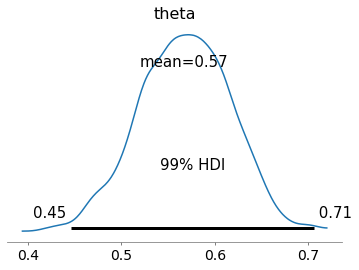

In [5]:
az.plot_posterior(trace, hdi_prob=0.99)

You can see that the mean and also the mode of the posterior distribution is around 57%. The 99% HPD (highest posterior density) is a so-called credible interval containing θ with a probability of 99%. 

If we are expected to give a single number, we would go for 57%. Otherwise, we are able to say that it’s somewhere between 45% and 71% with a probability of 99%.